In [1]:
import numpy as np
import pandas as pd

In [2]:
Data=pd.read_excel('C:\\Users\\asus\\OneDrive\\Documents\\Anvesh_project\\datageneration.xlsx')

In [4]:
data1=Data.iloc[:,1:5]
from sklearn.preprocessing import MinMaxScaler      # To preprocess the data and Normalise the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data1.values)

In [5]:
x = scaled_data[:,0:3]
y = scaled_data[:,3]

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15, random_state=0) 

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [8]:
net = Sequential()
net.add(Dense(90,input_dim=3,activation='linear'))      
net.add(Dense(100,activation='relu'))                    
net.add(Dense(1,activation='relu'))

In [9]:
net.compile(optimizer = 'adam', loss = 'MSE')

In [10]:
print(net.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 90)                360       
                                                                 
 dense_1 (Dense)             (None, 100)               9100      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 9,561
Trainable params: 9,561
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
history = net.fit(x_train, y_train, epochs = 1000, validation_split=0.15)

Epoch 1/1000
91/91 [==============================] - 2s 8ms/step - loss: 0.0866 - val_loss: 0.0941
Epoch 2/1000
91/91 [==============================] - 0s 3ms/step - loss: 0.0866 - val_loss: 0.0941
Epoch 3/1000
91/91 [==============================] - 0s 3ms/step - loss: 0.0866 - val_loss: 0.0941
Epoch 4/1000
91/91 [==============================] - 0s 4ms/step - loss: 0.0866 - val_loss: 0.0941
Epoch 5/1000
91/91 [==============================] - 0s 5ms/step - loss: 0.0866 - val_loss: 0.0941
Epoch 6/1000
91/91 [==============================] - 1s 7ms/step - loss: 0.0866 - val_loss: 0.0941
Epoch 7/1000
91/91 [==============================] - 1s 6ms/step - loss: 0.0866 - val_loss: 0.0941
Epoch 8/1000
91/91 [==============================] - 0s 4ms/step - loss: 0.0866 - val_loss: 0.0941
Epoch 9/1000
91/91 [==============================] - 0s 3ms/step - loss: 0.0866 - val_loss: 0.0941
Epoch 10/1000
91/91 [==============================] - 0s 4ms/step - loss: 0.0866 - val_loss: 0.0941

In [12]:
from sklearn.metrics import r2_score

In [13]:
y_train_pre = net.predict(x_train)

107/107 [==============================] - 1s 3ms/step


In [14]:
r2_train = r2_score(y_train, y_train_pre)
r2_train

-3.1422080345806913

In [15]:
y_test_pre=net.predict(x_test)
r2_test = r2_score(y_test, y_test_pre)
r2_test

19/19 [==============================] - 0s 2ms/step


-2.7967106697132613

In [16]:
from sklearn.metrics import mean_squared_error
mse_train=mean_squared_error(y_train,y_train_pre)
mse_train

0.08767767237412165

In [17]:
mse_test=mean_squared_error(y_test, y_test_pre)
mse_test

0.0891777738283458

In [18]:
from matplotlib import pyplot as p

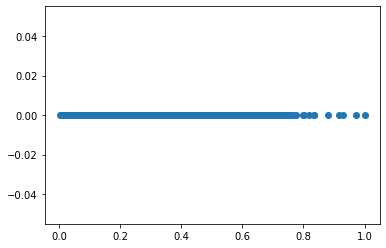

In [19]:
p.scatter(y_train, y_train_pre)

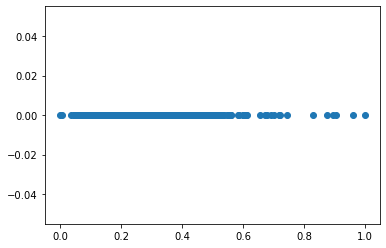

In [20]:
p.scatter(y_test, y_test_pre)